In [ ]:
from scipy.sparse import lil_matrix, kron, identity, csr_matrix
from scipy.sparse.linalg import eigsh, norm
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
C = {'up': np.zeros((4,4)), 'down': np.zeros((4,4))}  # single-site creation/anihilation operators
C['up'][0,1] = 1
C['up'][2,3] = 1
C['down'][0,2] = 1
C['down'][1,3] = 1

In [ ]:
C_dag = {'up': C['up'].T.conj(), 'down': C['down'].T.conj()}

In [ ]:
N=8

### Hamiltonian and Ground State

In [ ]:
H2=np.zeros((4**2,4**2))
for spin in ['up', 'down']:
  H2-= kron(C_dag[spin],C[spin]) + kron(C[spin],C_dag[spin])

H2=csr_matrix(H2/2)

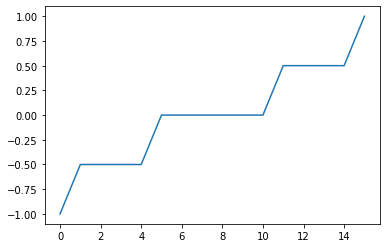

In [ ]:
a,b=np.linalg.eigh(H2.toarray())
plt.plot(a)

In [ ]:
gs=b[:,0]

keys=np.flip(np.argsort(np.abs(gs)))
for i in range(4):
  temp=bin(keys[i])[2:]
  print('0'*(4-len(temp))+temp, '\t', np.abs(gs[keys[i]])**2)

0011 	 0.25000000000000033
1001 	 0.24999999999999994
0110 	 0.24999999999999994
1100 	 0.2499999999999996


In [ ]:
H = H2.copy()
for i in range(N-2):
  H=kron(H,identity(4))+kron(identity(H.shape[0]//4),H2)

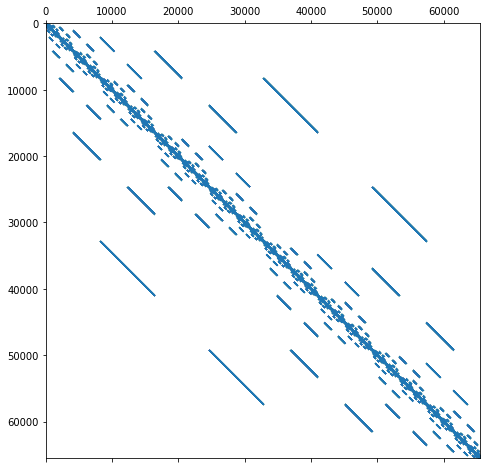

In [ ]:
plt.figure(figsize=(8,8))
plt.spy(H, markersize=0.1)
plt.show()

In [ ]:
tm=time.time()
l,v=eigsh(H, 1, which='SA') #Only one eigenvalue
print(time.time()-tm)

0.23219895362854004


In [ ]:
gs=v[:,0]

In [ ]:
'''
a,b=np.linalg.eigh(H.toarray())
plt.plot(a)
np.round(np.abs(b[:,0])**2,3)
'''

'\na,b=np.linalg.eigh(H.toarray())\nplt.plot(a)\nnp.round(np.abs(b[:,0])**2,3)\n'

### Projection Operator

In [ ]:
P2 = - H2

In [ ]:
Pi_odd = P2.copy()
for i in range(N//2-1):
  Pi_odd=kron(Pi_odd,P2)

Pi_even = identity(4)
for i in range(N//2-1):
  Pi_even=kron(Pi_even,P2)
Pi_even=kron(Pi_even,identity(4))

In [ ]:
A=Pi_odd@Pi_even

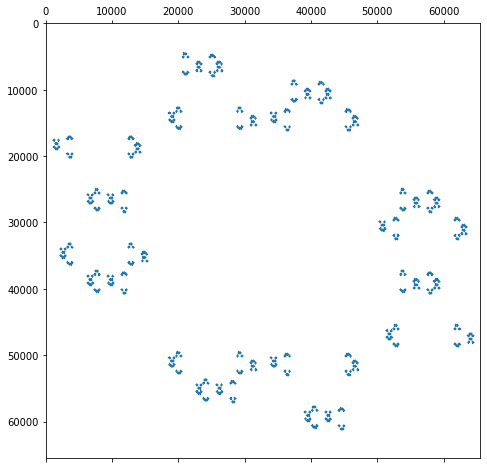

In [ ]:
plt.figure(figsize=(8,8))
plt.spy(A, markersize=0.1)
plt.show()

### Invariance of Ground State

In [ ]:
gs_new = A.dot(gs)

In [ ]:
np.abs(np.dot(gs.conj(),gs_new)) #Overlap of gs_new with ground state

0.023220992123280437

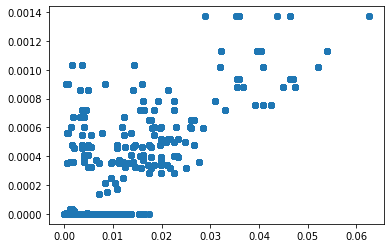

In [ ]:
plt.scatter(np.abs(gs),np.abs(gs_new))

### Entanglement

In [ ]:
def EE(S):
  S=np.abs(S)
  return -np.sum(S**2*np.log(S**2))

In [ ]:
psi=(np.random.rand(4**N)-0.5)+1j*(np.random.rand(4**N)-0.5)
psi=psi/np.linalg.norm(psi)

In [ ]:
psi=np.reshape(psi,(4**(N//2),4**(N//2)))
U,S,Vh=np.linalg.svd(psi)

In [ ]:
psi=np.reshape(psi,-1)
psi_new = A.dot(psi)

In [ ]:
psi_new=psi_new/np.linalg.norm(psi_new) #Normalization

In [ ]:
psi_new=np.reshape(psi_new,(4**(N//2),4**(N//2)))
U,S_new,Vh=np.linalg.svd(psi_new)

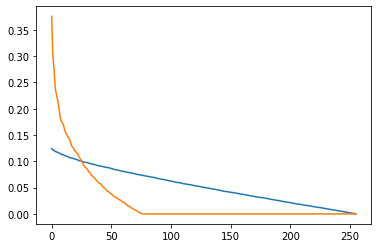

In [ ]:
plt.plot(S)
plt.plot(S_new)

In [ ]:
EE(S), EE(S_new)

(5.045461902629102, 3.3896465247849914)

In [ ]:
np.linalg.norm(S), np.linalg.norm(S_new)

(1.0000000000000004, 0.9999999999999997)

In [ ]:
psi_new=np.reshape(psi_new,-1)

### Energy

In [ ]:
np.real(np.dot(psi.conj(),H.dot(psi))) #Energy of psi

0.04722549637349938

In [ ]:
np.real(np.dot(psi_new.conj(),H.dot(psi_new))) #Energy of psi_new

-0.36325433029005205

In [ ]:
np.real(np.dot(gs.conj(),H.dot(gs))) #Energy of Ground State

-1.0917757051857095

### Overlap

In [ ]:
np.abs(np.dot(gs.conj(),psi)) #Overlap of psi with ground state

0.009005824696667764

In [ ]:
np.abs(np.dot(gs.conj(),psi_new)) #Overlap of psi_new with ground state

0.10204526104166214

In [ ]:
np.abs(gs)**2

array([1.58694941e-38, 4.25848318e-40, 3.10497560e-41, ...,
       9.66799527e-42, 1.23220952e-39, 1.28691706e-40])